In [1]:
#Loading images
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
square_path = "./square.png"
image_path = "./image.png"
# Convert the image to grayscale
square_img = Image.open(square_path).convert("L")  # Convert to grayscale
image_img = Image.open(image_path).convert("L")  # Convert to grayscale
#Convert the image into an array
square_array = np.array(square_img)
image_array = np.array(image_img)

In [4]:
#Define the fill function
def apply_padding(image, padding_size=1):
    padded_image = np.pad(image, pad_width=padding_size, mode='constant', constant_values=0)
    return padded_image

def convolution_sobel(image):
    # Define the sobel kernel
    sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    # Fill the image to avoid edge pixel loss
    padded_image = apply_padding(image, padding_size=1)
    height, width = image.shape
    sobel_x = np.zeros_like(image, dtype=float)  
    sobel_y = np.zeros_like(image, dtype=float)  

    for i in range(height):
        for j in range(width):
            region = padded_image[i:i+3, j:j+3]
            sobel_x[i, j] = np.sum(region * sobel_x_kernel)
            sobel_y[i, j] = np.sum(region * sobel_y_kernel)
    sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)
    return sobel_x, sobel_y, sobel_combined
sobel_x, sobel_y, sobel_combined = convolution_sobel(image_array)

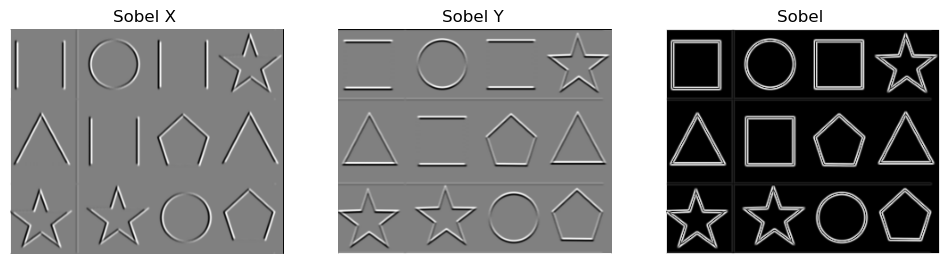

In [6]:
#Show the effect of image convolution
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Sobel X ")
plt.imshow(sobel_x, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Sobel Y ")
plt.imshow(sobel_y, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Sobel ")
plt.imshow(sobel_combined, cmap="gray")
plt.axis("off")

plt.show()

In [8]:
#relu activation function
def relu_activation(feature_map):
    height, width = feature_map.shape
    activated_map = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            activated_map[i, j] = max(0, feature_map[i, j])
    return activated_map
relu_activated_map = relu_activation(sobel_combined)

In [10]:
relu_activated_map

array([[1030.48047046, 1012.        , 1012.        , ..., 1020.        ,
        1020.        , 1081.87337522],
       [ 987.97267169,  132.        ,  132.        , ...,    0.        ,
           0.        , 1020.        ],
       [1018.01768158,    8.        ,    8.        , ...,    0.        ,
           0.        , 1020.        ],
       ...,
       [1003.14904177,   64.        ,   64.        , ...,    0.        ,
           0.        , 1020.        ],
       [ 954.82982777,  152.        ,  152.        , ...,    0.        ,
           0.        , 1020.        ],
       [ 982.00305499,  956.        ,  956.        , ..., 1020.        ,
        1020.        , 1081.87337522]])

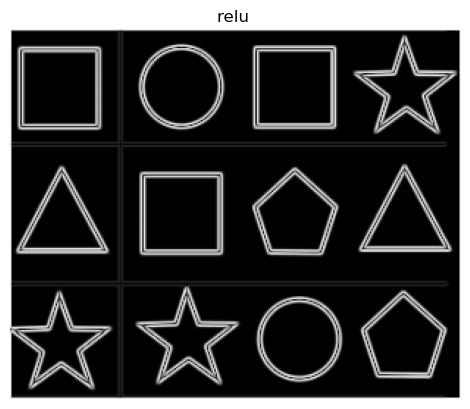

In [14]:
#Image features after activation function
plt.subplot()
plt.title("relu ")
plt.imshow(relu_activated_map, cmap="gray")
plt.axis("off")
plt.show()

In [16]:
#Pooling (downsampling) function
def pooling_downsample(image, pool_size=2):
    h, w = image.shape
    new_h, new_w = h // pool_size, w // pool_size  
    downsampled_image = np.zeros((new_h, new_w), dtype=image.dtype)  
    for i in range(new_h):
        for j in range(new_w):
            start_x, start_y = i * pool_size, j * pool_size
            pool_region = image[start_x:start_x + pool_size, start_y:start_y + pool_size]
            downsampled_image[i, j] = np.max(pool_region)
    return downsampled_image

In [18]:
#Pooling (downsampling) the image
pooled_image_array = pooling_downsample(relu_activated_map)

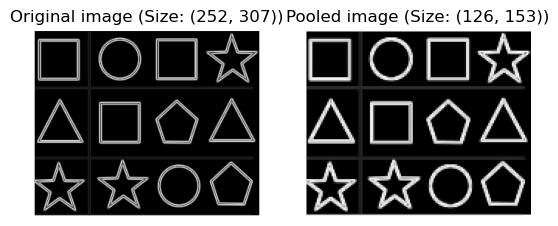

In [20]:
# Original Image
plt.subplot(1, 2, 1)
plt.title(f"Original image (Size: {sobel_combined.shape})")
plt.imshow(sobel_combined, cmap="gray")
plt.axis("off")

# Image after pooling
plt.subplot(1, 2, 2)
plt.title(f"Pooled image (Size: {pooled_image_array.shape})")
plt.imshow(pooled_image_array, cmap="gray")
plt.axis("off")

plt.show()

In [22]:
#Making Icon Features
icon_sobel_x, icon_sobel_y, icon_sobel_combined = convolution_sobel(square_array)
relu_icon = relu_activation(icon_sobel_combined)
pooled_icon = pooling_downsample(relu_icon)

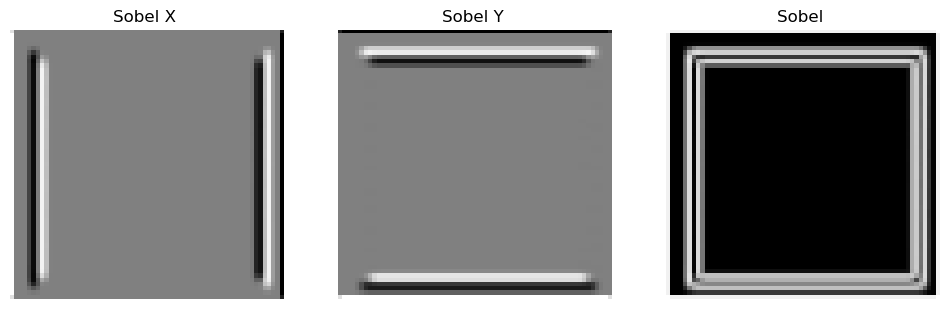

In [24]:
#Show the effect of icon convolution
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Sobel X ")
plt.imshow(icon_sobel_x, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Sobel Y ")
plt.imshow(icon_sobel_y, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Sobel ")
plt.imshow(icon_sobel_combined, cmap="gray")
plt.axis("off")

plt.show()

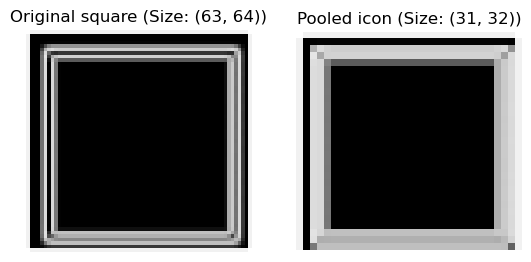

In [26]:
#Icon Display
plt.subplot(1, 2, 1)
plt.title(f"Original square (Size: {icon_sobel_combined.shape})")
plt.imshow(icon_sobel_combined, cmap="gray")
plt.axis("off")

# Pooled icons
plt.subplot(1, 2, 2)
plt.title(f"Pooled icon (Size: {pooled_icon.shape})")
plt.imshow(pooled_icon, cmap="gray")
plt.axis("off")

plt.show()

In [28]:
#ncc
def normalized_cross_correlation(image, template):
    h, w = image.shape
    th, tw = template.shape
    ncc_map = np.zeros((h - th + 1, w - tw + 1))

    template_mean = np.mean(template)
    template_std = np.std(template)

    for i in range(h - th + 1):
        for j in range(w - tw + 1):
            region = image[i:i + th, j:j + tw]
            region_mean = np.mean(region)
            region_std = np.std(region)

            if region_std > 0 and template_std > 0:
                numerator = np.sum((region - region_mean) * (template - template_mean))
                denominator = th * tw * region_std * template_std
                ncc_map[i, j] = numerator / denominator

    return ncc_map

In [30]:
#nms
def non_maximum_suppression(ncc_map, threshold, window_size=10):
    h, w = ncc_map.shape
    boxes = []

    for i in range(h):
        for j in range(w):
            if ncc_map[i, j] >= threshold:
                is_maximum = True
                for di in range(-window_size // 2, window_size // 2 + 1):
                    for dj in range(-window_size // 2, window_size // 2 + 1):
                        ni, nj = i + di, j + dj
                        if 0 <= ni < h and 0 <= nj < w and ncc_map[ni, nj] > ncc_map[i, j]:
                            is_maximum = False
                            break
                    if not is_maximum:
                        break
                if is_maximum:
                    boxes.append((i, j))
    return boxes

In [32]:
def draw_boxes(image, boxes, template_height, template_width):
    output_image = np.stack([image] * 3, axis=-1)

    for box in boxes:
        i, j = box
        for x in range(template_width):
            if j + x < output_image.shape[1]:
                output_image[i, j + x] = [255, 0, 0]
                output_image[i + template_height - 1, j + x] = [255, 0, 0]
        for y in range(template_height):
            if i + y < output_image.shape[0]:
                output_image[i + y, j] = [255, 0, 0]
                output_image[i + y, j + template_width - 1] = [255, 0, 0]

    return output_image

In [34]:
# Calculate the NCC similarity matrix
ncc_map = normalized_cross_correlation(pooled_image_array, pooled_icon)

In [36]:
# Set similarity threshold(0.5) and perform non-maximum suppression
threshold = 0.5
boxes = non_maximum_suppression(ncc_map, threshold=threshold)

In [38]:
# Map the detected frame coordinates back to the original image
pool_size = 2
original_boxes = [(i * pool_size, j * pool_size) for i, j in boxes]

In [40]:
# The height and width of the original template
template_h, template_w = pooled_icon.shape
original_template_h, original_template_w = template_h * pool_size, template_w * pool_size

In [42]:
#Draw a red rectangle on the original image
result_image = draw_boxes(image_array, original_boxes, original_template_h, original_template_w)

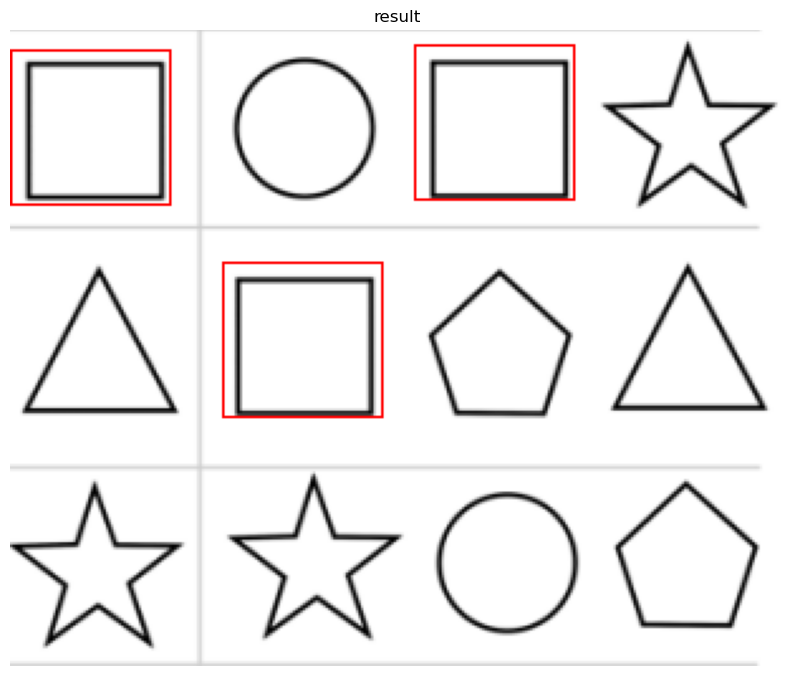

In [44]:
# Display results
plt.figure(figsize=(10, 10))
plt.title("result")
plt.imshow(result_image)
plt.axis("off")
plt.show()